K-Nearest Neighbor (K-NN) CLASSIFICATION NOTEBOOK

![](https://www.researchgate.net/profile/Shohal-Hossain-2/publication/367220930/figure/fig1/AS:11431281113694842@1674035105600/Three-species-of-IRIS-flower.jpg)

In [2]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
#Import libraries for model validation
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Load Dataset

In [7]:
iris= load_iris()

In [8]:
#To convert the iris dataset to dataframe, create a variable df
df = pd.DataFrame(iris.data,columns= iris.feature_names)

In [9]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [11]:
#To create a new column  'target' and 'flower_name'
df['target'] = iris.target
df['flower_name'] = df['target'].apply(lambda x: iris.target_names[x])
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [12]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [13]:
#Preparing features
x= df.drop(['target', 'flower_name'], axis=1)
y= df['target']

In [15]:
#Scaling data
scaler= StandardScaler()
x_scalled= scaler.fit_transform(x)

In [16]:
#with variable 'sse', create a list to find the optimal value
sse = []
k_range = range(1,11)
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(x_scalled)
    sse.append(km.inertia_)


Using elbow method to determine the Optimal number of clusters for k_means

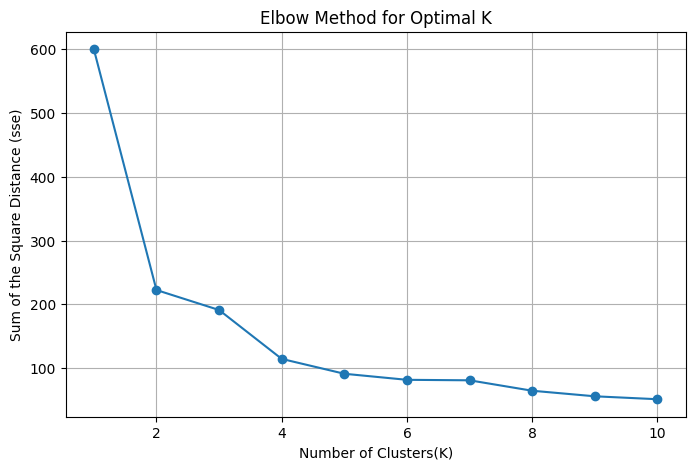

In [19]:
plt.figure (figsize=(8,5))
plt.plot(k_range, sse, marker = 'o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters(K)')
plt.ylabel('Sum of the Square Distance (sse)')
plt.grid(True)
plt.show()


From the above figure, the optimal value is 3 i.e the point that is closest to elbow_shape

Making Prediction With KMeans (clustering algorithm)

In [20]:
#create a new variable km
km = KMeans(n_clusters=3, random_state=42)
df['cluster'] = km.fit_predict(x_scalled)

In [21]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name,cluster
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,2
2,4.7,3.2,1.3,0.2,0,setosa,2
3,4.6,3.1,1.5,0.2,0,setosa,2
4,5.0,3.6,1.4,0.2,0,setosa,1
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,0
146,6.3,2.5,5.0,1.9,2,virginica,0
147,6.5,3.0,5.2,2.0,2,virginica,0
148,6.2,3.4,5.4,2.3,2,virginica,0


Principal Component Analysis (PCA)



In [23]:
#create a variable pca
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scalled)
df['pca1'] = x_pca[:,0]
df['pca2'] = x_pca[:,1]
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name,cluster,pca1,pca2
0,5.1,3.5,1.4,0.2,0,setosa,1,-2.264703,0.480027
1,4.9,3.0,1.4,0.2,0,setosa,2,-2.080961,-0.674134
2,4.7,3.2,1.3,0.2,0,setosa,2,-2.364229,-0.341908
3,4.6,3.1,1.5,0.2,0,setosa,2,-2.299384,-0.597395
4,5.0,3.6,1.4,0.2,0,setosa,1,-2.389842,0.646835
...,...,...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,0,1.870503,0.386966
146,6.3,2.5,5.0,1.9,2,virginica,0,1.564580,-0.896687
147,6.5,3.0,5.2,2.0,2,virginica,0,1.521170,0.269069
148,6.2,3.4,5.4,2.3,2,virginica,0,1.372788,1.011254


Visualising Using PCA

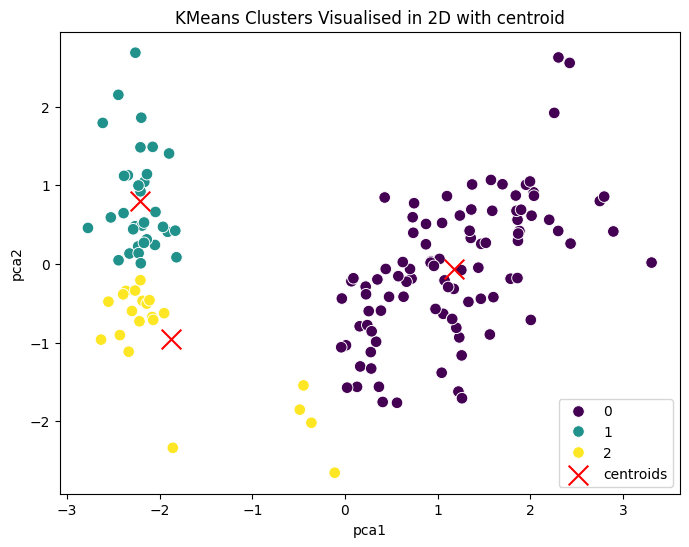

In [36]:
#plot a scatter diagram
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='viridis', s=70)
#to reduce a 4-D cluster to a 2-D cluster
centroids_2d = pca.transform(km.cluster_centers_)
plt.scatter(centroids_2d[:,0], centroids_2d[:,1], s=200, c='red', marker='x', label='centroids')
plt.legend()
plt.title('KMeans Clusters Visualised in 2D with centroid')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

Training  Model

In [38]:
#split data into train and test
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)
#create  a variable knn (k-nearest neighbor)
knn= KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

Cheking Model Accuracy

In [41]:
accuracy = knn.score(x_test, y_test)
print(f'Model Accuracy: {accuracy: .2f}')

Model Accuracy:  0.97


Making Prediction

In [44]:
#create a new dataset of flowers
sample = [[4.8, 3.0, 1.5, 0.3]]
pred_class = knn.predict(sample)[0]
pred_name  = iris.target_names[pred_class]
print(f"Predicted Class: {pred_name}")


Predicted Class: setosa


C:\Users\admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix

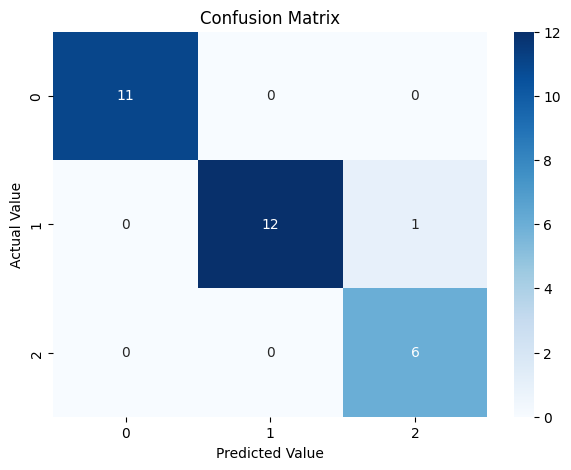

In [46]:
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot= True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value') 
plt.title('Confusion Matrix')
plt.show()
           

Classification Report

In [48]:
print('Classification Report:\n')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

